In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.array as da
import datetime 
import gc
from multiprocessing import pool
import cPickle as pickle
import os
import feather

In [3]:
newdata=feather.read_dataframe("../input/tmp_R_sales.feather")

In [ ]:
subdf=newdata[newdata.state==state]

In [4]:
print "count by counties"

count by counties


In [6]:
for state in ['06']:
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='parcelid',aggfunc='count')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06085           403877.0  410179.0  412050.0  413142.0  413517.0  414790.0   
06001           334046.0  336145.0  337649.0  377146.0  378211.0  380001.0   
06013           323207.0  324693.0  325244.0  325981.0  326291.0  326702.0   
06081           188153.0  188908.0  189252.0  189615.0  189832.0  190117.0   
06097           143343.0  143593.0  143827.0  140028.0  140242.0  140347.0   
06075           133558.0  136395.0  138333.0  139809.0  142203.0  143355.0   
06041            78999.0   79094.0   79160.0   79378.0   79532.0   79643.0   
06087            71327.0   71781.0   72111.0   72352.0   72482.0   72654.0   
06055            36875.0   37073.0   37191.0   37276.0   37300.0   37346.0   
06095                1.0       1.0       1.0       1.0       1.0       1.0   

assessmentyear      2013      2014      2015      2016      2017  \
county                                                             
06085           416674.0       5.0  421370.0  421468.0  421499.0   
06001           381652.0  382681.0  384184.0  384213.0  384221.0   
06013           326752.0  328387.0  312274.0  329422.0  329436.0   
06081           190321.0  190663.0  190999.0  191003.0  191004.0   
06097           145264.0  145344.0  145833.0  145848.0  145850.0   
06075           143754.0  144173.0  145740.0  145749.0  145763.0   
06041            79761.0   79867.0   80096.0   80098.0   80099.0   
06087                1.0   73236.0   73373.0   73373.0   73375.0   
06055            37780.0   37857.0   38067.0   38067.0   38073.0   
06095                1.0       1.0       1.0       1.0       1.0   

assessmentyear           mean  
county                         
06085           377142.812500  
06001           369104.468750  
06013           325308.093750  
06081           189987.906250  
06097           143592.640625  
06075           141712.000000  
06041            79611.546875  
06087            66005.906250  
06055            37536.816406  
06095                1.000000

In [7]:
for state in ['06']:
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='landassessedvalue',aggfunc='count')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06085           403604.0  409901.0  411770.0  412820.0  413153.0  414311.0   
06001           332252.0  334301.0  335742.0  372351.0  373386.0  375080.0   
06013           321455.0  322881.0  323407.0  324122.0  324404.0  324781.0   
06081           187150.0  187846.0  188165.0  188477.0  188680.0  189016.0   
06075           133182.0  136061.0  138249.0  139542.0  142022.0  142927.0   
06097           138442.0  139147.0  139290.0  139409.0  139620.0  139727.0   
06041            78789.0   78869.0   78929.0   79144.0   79296.0   79390.0   
06087            69297.0   69641.0   69855.0   70044.0   70144.0   70274.0   
06055            35449.0   35601.0   35670.0   35731.0   35740.0   35768.0   
06095                1.0       1.0       1.0       1.0       1.0       1.0   

assessmentyear      2013      2014      2015      2016      2017  \
county                                                             
06085           414803.0       5.0  419502.0  419597.0  419610.0   
06001           376608.0  377574.0  378965.0  378988.0  379001.0   
06013           324802.0  326415.0  310348.0  327404.0  327414.0   
06081           189193.0  189513.0  189821.0  189831.0  189831.0   
06075           143306.0  144016.0  145633.0  145661.0  145677.0   
06097           140535.0  140677.0  141098.0  141124.0  141128.0   
06041            79488.0   79585.0   79804.0   79807.0   79811.0   
06087                1.0   70625.0   70748.0   70755.0   70759.0   
06055            36171.0   36231.0   36404.0   36404.0   36411.0   
06095                1.0       1.0       1.0       1.0       1.0   

assessmentyear           mean  
county                         
06085           376279.625000  
06001           364931.625000  
06013           323403.000000  
06081           188865.734375  
06075           141479.640625  
06097           140017.906250  
06041            79355.632812  
06087            63831.183594  
06055            35961.816406  
06095                1.000000

In [8]:
landassessedvalue=pd.pivot_table(subdf,index='parcelid',columns='assessmentyear',values='landassessedvalue',aggfunc='first')

In [10]:
improvementassessedvalue=pd.pivot_table(subdf,index='parcelid',columns='assessmentyear',values='improvementassessedvalue',aggfunc='first')

In [11]:
totalassessedvalue=pd.pivot_table(subdf,index='parcelid',columns='assessmentyear',values='totalassessedvalue',aggfunc='first')

In [13]:
improvementassessedvalue.head()

assessmentyear  2007  2008  2009      2010      2011      2012      2013  \
parcelid                                                                   
8921076          NaN   NaN   NaN  141400.0  133000.0  139230.0  142014.0   
8921077          NaN   NaN   NaN  143500.0  142800.0  133000.0  143500.0   
8921078          NaN   NaN   NaN  142800.0  142800.0  129500.0  132090.0   
8921079          NaN   NaN   NaN  136176.0  137201.0  139945.0  142743.0   
8921080          NaN   NaN   NaN  194600.0  194600.0  161364.0  164591.0   

assessmentyear      2014      2015      2016      2017  
parcelid                                                
8921076         142658.0  145509.0  147727.0  150680.0  
8921077         155525.0  158631.0  161049.0  164268.0  
8921078         132689.0  135340.0  137403.0  140151.0  
8921079         143390.0  146254.0  148483.0  151452.0  
8921080         165337.0  168641.0  171211.0  174635.0

In [14]:
landassessedvalue.head()

assessmentyear  2007  2008  2009     2010     2011     2012     2013     2014  \
parcelid                                                                        
8921076          NaN   NaN   NaN  60600.0  57000.0  59670.0  60863.0  61139.0   
8921077          NaN   NaN   NaN  61500.0  61200.0  57000.0  61500.0  66653.0   
8921078          NaN   NaN   NaN  61200.0  61200.0  55500.0  56610.0  56866.0   
8921079          NaN   NaN   NaN  58361.0  58800.0  59976.0  61175.0  61453.0   
8921080          NaN   NaN   NaN  83400.0  83400.0  69156.0  70539.0  70859.0   

assessmentyear     2015     2016     2017  
parcelid                                   
8921076         62361.0  63311.0  64577.0  
8921077         67984.0  69021.0  70400.0  
8921078         58003.0  58887.0  60064.0  
8921079         62680.0  63635.0  64908.0  
8921080         72274.0  73376.0  74843.0

In [23]:
def g(df):
    df=np.log(df)
    df=df.diff(axis=1)
    return np.exp(df)-1

In [27]:
g(improvementassessedvalue.head(20))

assessmentyear  2007      2008      2009      2010      2011      2012  \
parcelid                                                                 
8921076          NaN       NaN       NaN       NaN -0.059406  0.046842   
8921077          NaN       NaN       NaN       NaN -0.004878 -0.068628   
8921078          NaN       NaN       NaN       NaN  0.000000 -0.093138   
8921079          NaN       NaN       NaN       NaN  0.007527  0.020000   
8921080          NaN       NaN       NaN       NaN  0.000000 -0.170791   
8921081          NaN       NaN       NaN       NaN  0.000000 -0.049180   
8921082          NaN       NaN       NaN       NaN  0.000000 -0.024510   
8921083          NaN       NaN       NaN       NaN  0.000000 -0.157143   
8921084          NaN       NaN       NaN -0.448648  0.000000 -0.068628   
8921087          NaN       NaN       NaN       NaN  0.000000 -0.045455   
8921088          NaN       NaN       NaN       NaN       NaN       NaN   
8921092          NaN       NaN       NaN       NaN  0.000000 -0.047619   
8921093          NaN       NaN       NaN       NaN  0.000000 -0.047619   
8921094          NaN       NaN       NaN       NaN  0.000000 -0.049180   
8921095          NaN       NaN       NaN       NaN  0.007527  0.019997   
8921101          NaN  0.171731  0.473955 -0.677780       NaN       NaN   
8921109          NaN  0.020074  0.020021 -0.002454  0.007602  0.019971   
8921111          NaN       NaN       NaN       NaN       NaN       NaN   
8921114          NaN  0.020067  0.019944 -0.002311  0.007483  0.019984   
8921116          NaN  0.019995 -0.509923 -0.133334  0.000000  0.000000   

assessmentyear      2013      2014      2015      2016      2017  
parcelid                                                          
8921076         0.019996  0.004534  0.019985  0.015243  0.019990  
8921077         0.078947  0.083799  0.019970  0.015243  0.019988  
8921078         0.020000  0.004534  0.019979  0.015243  0.020000  
8921079         0.019994  0.004533  0.019973  0.015241  0.019996  
8921080         0.019998  0.004533  0.019983  0.015239  0.020000  
8921081         0.000000  0.891926  0.171374  0.015251  0.020000  
8921082         0.020000  0.004532  0.019982  0.015242  0.020000  
8921083         0.020000  0.004534  0.019976  0.015245  0.019998  
8921084         0.078947  0.585366  0.019978  0.015247  0.019997  
8921087         0.023810  0.604651  0.304348  0.120933  0.019997  
8921088              NaN       NaN       NaN       NaN       NaN  
8921092         0.025000  0.634146  0.271237  0.015253  0.020000  
8921093         0.025000  0.634146  0.313434  0.362081  0.019995  
8921094         0.000000  0.586207  0.019978  0.015245  0.020000  
8921095         0.019998  0.004532  0.019973  0.015240  0.019990  
8921101              NaN       NaN       NaN  3.455910  0.020000  
8921109         0.020015  0.004479  0.019960  0.015301  0.019992  
8921111              NaN       NaN       NaN       NaN       NaN  
8921114         0.020027  0.004504  0.019968  0.015263  0.020018  
8921116         0.115385  0.517242  0.318182  0.171053  0.019998

In [29]:
totalassessedvalue_ratio=g(totalassessedvalue)

In [34]:
totalassessedvalue_ratio.median() 

assessmentyear
2007         NaN
2008    0.019997
2009    0.019995
2010   -0.002374
2011    0.007525
2012    0.019993
2013    0.019997
2014    0.004537
2015    0.019978
2016    0.015248
2017    0.019997
dtype: float32

In [137]:
a=totalassessedvalue_ratio.iloc[:,8].dropna()
a=a[a<0.03]
a=a[a>0.01]
a=np.round(a,3)
a=a[a<>0.02]
a.shape

(10924,)

In [161]:
print totalassessedvalue.iloc[3931]
totalassessedvalue_ratio.iloc[3931] 

assessmentyear
2007         NaN
2008         NaN
2009         NaN
2010     89842.0
2011     90518.0
2012    110000.0
2013    110000.0
2014    176415.0
2015    179940.0
2016    182683.0
2017    186335.0
Name: 8926494, dtype: float32


assessmentyear
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011    0.007525
2012    0.215227
2013    0.000000
2014    0.603773
2015    0.019982
2016    0.015244
2017    0.019991
Name: 8926494, dtype: float32

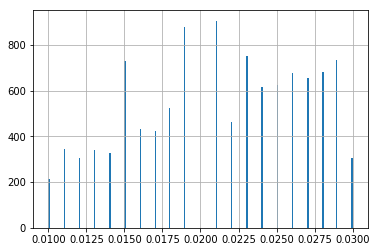

In [138]:
a.hist(bins=200)

In [90]:
x=np.arange(0,1,0.02)[1:] 

In [145]:
np.percentile(totalassessedvalue_ratio.iloc[:,3].dropna(),x*100)

array([-0.28862476, -0.20903975, -0.16354575, -0.13000011, -0.10351175,
       -0.08166932, -0.06103301, -0.04411745, -0.02656816, -0.00607849,
       -0.00239277, -0.00238705, -0.00238323, -0.00238132, -0.00237942,
       -0.00237846, -0.00237757, -0.00237662, -0.00237566, -0.00237566,
       -0.00237471, -0.00237471, -0.00237375, -0.00237375, -0.00237375,
       -0.0023728 , -0.0023728 , -0.0023728 , -0.00237185, -0.00237185,
       -0.00237185, -0.00237185, -0.00237185, -0.00237089, -0.00237089,
       -0.00237089, -0.00237089, -0.00236994, -0.00236994, -0.00236899,
       -0.00236803, -0.00236517, -0.00235188,  0.        ,  0.        ,
        0.04252411,  0.08581206,  0.15925323,  0.37235484])

In [140]:
plt.plot(x, np.percentile(totalassessedvalue_ratio.iloc[:,10].dropna(),x*100))

In [72]:
np.percentile(totalassessedvalue_ratio.iloc[:,10].dropna(),[0,15,20,30,50,70,80,90,95])

array([-0.99975556,  0.01999259,  0.01999462,  0.01999557,  0.01999748,
        0.0199995 ,  0.0199995 ,  0.02002084,  0.13002968])

In [54]:
totalassessedvalue_ratio.iloc[:,1].dropna().max()

146300.94

In [40]:
totalassessedvalue_ratio.iloc[:,1].median()

0.0199965238571167